In [1]:
import pandas as pd
import numpy as np
from evoml.subspacing import FeatureStackerFEGT, FeatureStackerFEMPO, FeatureStackerFECV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits, load_breast_cancer, load_iris, load_mlcomp

In [70]:
data = load_breast_cancer()

In [71]:
features = data.data
features = pd.DataFrame(features)
output = pd.DataFrame(data.target)

In [6]:
print(features.shape)
output[0].unique()

(1797, 64)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [7]:
#data = pd.read_csv('datasets/GAMETES.csv',sep='\t')
# data = pd.read_csv('datasets/GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_EDM-1_1.txt',sep='\t')
# headers_ = list(data.columns)
# features = data[headers_[0:-1]]
# output = data[headers_[-1]]

In [8]:
from sklearn.tree import DecisionTreeClassifier


## Expriment 1 
----

In [25]:
def check_for_benchmarks():
    n_estimators=30
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

    # The exploration of the dataset by benchmark algorithms
    clf = DecisionTreeClassifier(random_state=34092)
    clf.fit(X_train, y_train)
    pred_DTC = clf.predict(X_test)
    a = clf.score(X_test, y_test)
    print('Base DecisionTreeClassifier accuracy: {}'.format(clf.score(X_test, y_test)))

    clf = RandomForestClassifier(random_state=34092, n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    pred_RFC = clf.predict(X_test)
    b = clf.score(X_test, y_test)
    print('Base RandomForestClassifier accuracy: {}'.format(clf.score(X_test, y_test)))

    clf = GradientBoostingClassifier(random_state=34092, n_estimators=n_estimators)
    clf.fit(X_train, y_train)
    pred_GBC = clf.predict(X_test)
    c = clf.score(X_test, y_test)
    print('Base GradientBoostingClassifier accuracy: {}'.format(clf.score(X_test, y_test)))

    print('')
    return a,b,c

In [18]:
check_for_benchmarks()

Base DecisionTreeClassifier accuracy: 0.8780487804878049
Base RandomForestClassifier accuracy: 0.9490022172949002


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base GradientBoostingClassifier accuracy: 0.9223946784922394



(0.87804878048780488, 0.9490022172949002, 0.92239467849223944)

In [34]:
all_acc = []
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
# max_features = int(pd.np.sqrt(X_train.shape[1]))
for i in range(0,1):
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(features, output, stratify=output,
                                                            train_size=0.75, test_size=0.25)
    a, b, c = check_for_benchmarks()
    clf_dt = DecisionTreeClassifier(max_depth=None, random_state=34092)
#     clf_lr = LogisticRegressionCV()
    #clf = FeatureStackerFEMPO(base_estimator=clf_dt, model_type = 1, N_individual=5, ngen=10, verbose_flag = True, N_population=10, maxOrmin = 1)
    clf = FeatureStackerFECV(base_estimator=clf_dt, model_type = 'classification', N_individual=30,
                             ngen=10, verbose_flag = True, N_population=30, maxOrMin = 1
                            ,featMax = None, featMin=1, folds_CV=7)
    clf.fit(X_train, y_train[0])
    pred = clf.predict(X_test)
    d = accuracy_score(pred,y_test)
    all_acc.append([a,b,c,d])

0
Base DecisionTreeClassifier accuracy: 0.8536585365853658
Base RandomForestClassifier accuracy: 0.9689578713968958


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base GradientBoostingClassifier accuracy: 0.9445676274944568

gen	nevals	avg     	min     	max     
0  	30    	0.950206	0.925126	0.962112
1  	18    	0.955705	0.942939	0.964402
2  	22    	0.961052	0.946562	0.972462
3  	21    	0.965562	0.960769	0.972462
4  	19    	0.967498	0.961398	0.972543
5  	21    	0.969042	0.965027	0.972543
6  	23    	0.97031 	0.966612	0.972543
7  	19    	0.970685	0.964398	0.972543
8  	20    	0.97113 	0.96568 	0.97257 
9  	23    	0.971859	0.966642	0.974016
10 	23    	0.972135	0.968127	0.974726


In [51]:
d


0.97339246119733924

In [29]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.95121951219512191

In [34]:
shapes = [eg.X.shape[1] for eg in clf.hof[0]]

In [11]:
pd.DataFrame(all_acc)

,0,1,2,3
0,0.847007,0.926829,0.900222,0.957871


In [43]:
original = clf.hof[0][:]

In [57]:
from evoml.subspacing.util import EstimatorGene
hof = []
bagged_hof = []
for i,eg in enumerate(original):
    xcols = eg.X.columns
    data = eg.X.copy()
    data['class'] = y_train
    data = data.sample(frac=1, replace=True)
    X = data.loc[:,xcols]
    y = data['class']
    eg_ = EstimatorGene(X,y,[],[],clf_dt)
    bagged_hof.append(eg_)
hof.append(bagged_hof)

In [58]:
# X.shape

In [59]:
clf.hof = hof[:]

In [60]:
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.96452328159645229

In [56]:
xcols

Int64Index([10, 61, 45, 19, 38, 39, 32, 48, 29, 56, 46, 22, 30, 37, 42, 24,  0,
            26, 17, 20, 44, 11, 21,  8, 55,  6, 40, 36, 14, 43, 58, 13, 49,  1,
             9, 23,  5, 60, 25, 54, 41,  2,  3,  4, 34, 59, 28],
           dtype='int64')

In [113]:
y.shape

(150, 3)

In [122]:
from sklearn.svm import SVC, LinearSVC

In [110]:
from sklearn.metrics import roc_curve, recall_score
from sklearn.preprocessing import label_binarize

In [117]:
pd.np.linspace(0.1,10,100)

array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
         7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
         8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,   9. ,
         9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,   9.9,  10. ])

In [123]:
ts = []
fs = []
iris = load_breast_cancer()
X = iris.data
y = iris.target

# Binarize the output
# y = label_binarize(y, classes=[0, 1, 2])
# n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

for c in pd.np.linspace(0.1,2,11):
    clf = LinearSVC(C = c)
    output = y
    features = X
    y_true = output
    y_pred = clf.fit(features, output).predict(features)
    tpr = recall_score(y_true, y_pred)
    frame = pd.DataFrame({'y_true': y_true[0], 'y_pred':y_pred})
    fpr =frame.loc[((frame.y_pred==1) & (frame.y_true==0))].shape[0]/float((y_true==0).sum())
    ts.append(tpr)
    fs.append(fpr)
    

In [99]:
%matplotlib inline

In [102]:
import matplotlib.pyplot as plt

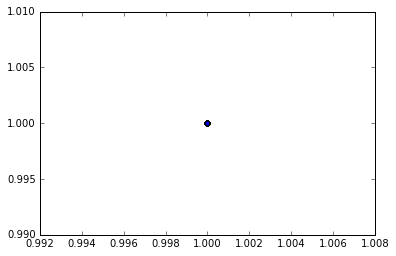

In [116]:
plt.scatter(ts, fs)

In [104]:
ts

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [105]:
fs

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]